In [1]:
import torch
import numpy as np
from PIL import Image


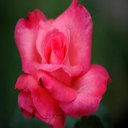

In [3]:
im = Image.open('image_01301.jpg')
im_small = im.resize((128, 128))
im_small

In [29]:


class PositionalEmbedding(torch.nn.Module):
    def __init__(self, embed_dim):
        super().__init__()
        self.freq = torch.exp(torch.arange(0, embed_dim, 2).float() / 2)

    def forward(self, x):
        # x.shape  B x 2
        x = x[..., None, :] * self.freq[..., None].to(x.device)
        return torch.cat([torch.sin(x), torch.cos(x)], dim=-1).view(*x.shape[:-2], -1)


# f, ax = plt.subplots(3, 3, figsize=(5, 5))

# pe = PositionalEmbedding(8)
# e = pe(torch.linspace(-1, 1, 100)[:, None])
# for i in range(8):
#     ax[i // 3, i % 3].plot(e[:, i].numpy())

0.3345322608947754
0.05570104718208313
0.027187442407011986
0.018459158018231392
0.01513759046792984
0.013185928575694561
0.012889753095805645
0.012730419635772705
0.012242196127772331
0.010243569500744343
0.010695687495172024
0.009810594841837883
0.00884134043008089
0.00929565541446209
0.008791464380919933
0.008538039401173592
0.009243355132639408
0.008254051208496094
0.00783113669604063
0.008085204288363457
0.00859403982758522
0.008505180478096008
0.008527582511305809
0.007533767726272345
0.007182260975241661
0.0075548565946519375
0.006831964012235403
0.008207231760025024
0.006878259591758251
0.007724585011601448
0.007318524178117514
0.006589115597307682
0.0067377351224422455
0.007000001147389412
0.0063403695821762085
0.006410866975784302
0.006236224435269833
0.007172554265707731
0.006433529779314995
0.006482399068772793
0.006514440756291151
0.006749764084815979
0.006221696734428406
0.0069040171802043915
0.006580951623618603
0.006195079535245895
0.006062761880457401
0.007001121994107

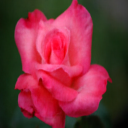

In [ ]:
class Rose(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.enc = PositionalEmbedding(12)
        self.net = torch.nn.Sequential(
            torch.nn.Linear(24, 256),
            torch.nn.ReLU(),
            torch.nn.Linear(256, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 64),
            torch.nn.ReLU(),
            torch.nn.Linear(64, 3),
        )


        ## This is a multi-layer perceptron
        ## start out with an encoder that takes x,y locations as an input and encodes it
        ## use x,y raw coordinates as our inputs
        ## in the end we output 3 values red, green, blue
    def forward(self, x):
        return self.net(self.enc(x))


rose_tensor = torch.as_tensor(np.array(im_small), dtype=torch.float32) / 255.0 - 0.5
position = torch.stack(torch.meshgrid(torch.linspace(-1, 1, 128), torch.linspace(-1, 1, 128)), dim=-1)

## Our dataset that we train has 2 values, 1 is the image of the rose, and the other is the coordinates

net = Rose()

rose_tensor = rose_tensor.cuda()
position = position.cuda()
net = net.cuda()

optim = torch.optim.Adam(net.parameters(), lr=1e-3)
for it in range(5000):
    optim.zero_grad()
    loss = abs(net(position) - rose_tensor).mean()
    if it % 100 == 0:
        print(float(loss))
    loss.backward()
    optim.step()

Image.fromarray(((net(position) + 0.5).clamp(0, 1) * 255).cpu().to(torch.uint8).numpy())

## By just changing the positional embedding here can make a hug different
## The network now can localize itself much better in the iimage itself, and memorize what color each pixel or each position has,
# just because it gets to see these wavefronts and these sine and cosine transformations of the inputs


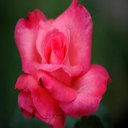

In [35]:
im_small

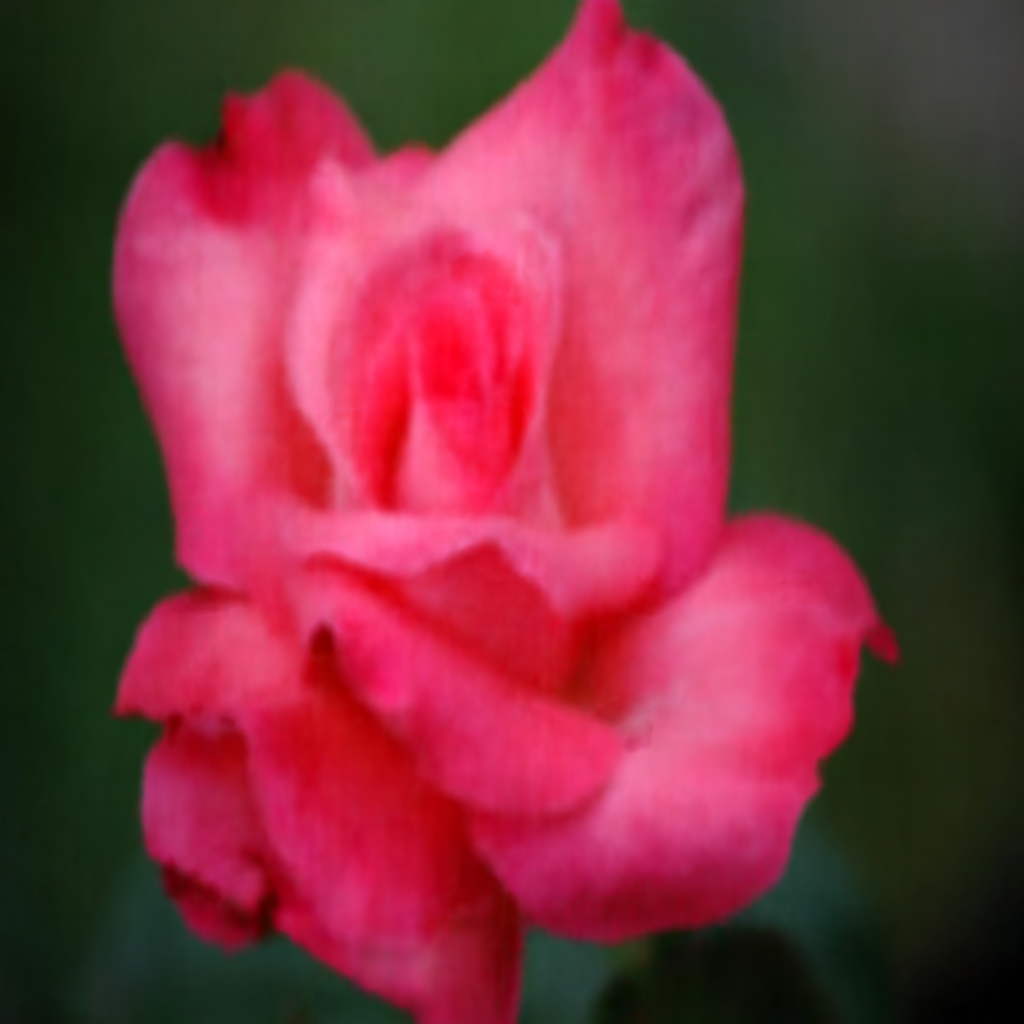

In [36]:
position_hires = torch.stack(torch.meshgrid(torch.linspace(-1, 1, 1024), torch.linspace(-1, 1, 1024)), dim=-1).cuda()

Image.fromarray(((net(position_hires) + 0.5).clamp(0, 1) * 255).cpu().to(torch.uint8).numpy())